In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

First of all, We will create a function that stitch two images to get in touch with the algorithms and to master them:

To do this, We need first to have two images to stitch, we will use a uttower image and we will try to use the basic methods to stitch them:

1. Load both images, convert to double and to grayscale

In [5]:
im1 = cv2.imread('uttower_left.jpg')
im2 = cv2.imread('uttower_right.jpg')

2. Detect feature points in both images. You can use the corner detector code provided (harris.m) or the blob detector
you have developed as part of the last homework. Report your choice. Display both the images alongwith the featre
points. 

In [6]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15


def alignImages(im1, im2):

    # Convert images to grayscale
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    # Detect ORB features and compute descriptors.
    orb = cv2.ORB_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)

    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    matches = matches[:numGoodMatches]

    # Draw top matches
    imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
    cv2.imwrite("matches.jpg", imMatches)

    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

    # Use homography
    height, width, channels = im2.shape
    im1Reg = cv2.warpPerspective(im1, h, (width, height))

    return im1Reg, h


In [11]:
im1Reg, _ = alignImages(im2,im1)

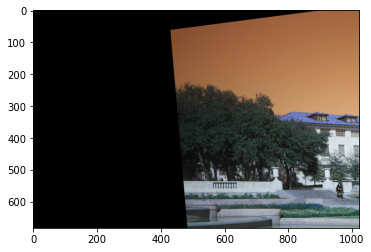

In [15]:
plt.imshow(im1Reg)